# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [53]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [54]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [55]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [56]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [58]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

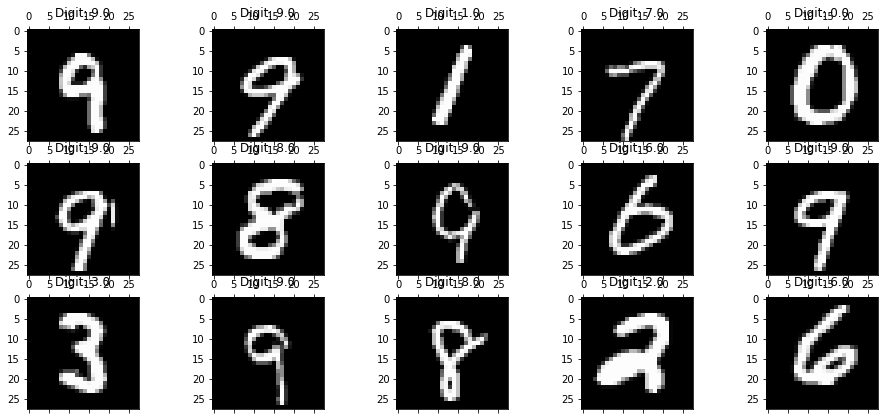

In [59]:
import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [60]:
scaled_X = X / 255.0

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state=42)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[1], copy=False)
PCA_X = pca.fit_transform(X_train)
PCA_X

KeyboardInterrupt: ignored

In [25]:
exv = pca.explained_variance_
exv.shape

(784,)

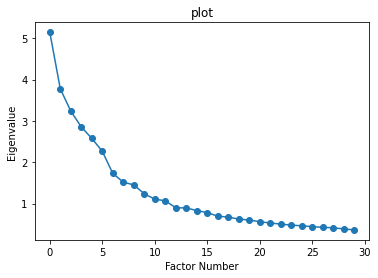

In [36]:
plt.title("plot")
plt.plot(np.arange(exv[:30].shape[0]), exv[:30], marker='o')
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.show()

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [31]:
pca = PCA(n_components=0.80, copy=False)
pca_x = pca.fit_transform(X_train)
exv = pca.explained_variance_
exv.shape

(43,)

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
lda_X = clf.fit_transform(X_train,y_train.reshape(-1)) 
lda_X.shape

(56000, 9)

In [63]:
clf.explained_variance_ratio_

array([0.23708117, 0.20328823, 0.17798282, 0.10633489, 0.09415639,
       0.06896763, 0.04990535, 0.03507761, 0.02720591])

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import time

from sklearn.metrics import accuracy_score

In [65]:
lr = LogisticRegression(max_iter=1000, random_state=42) 
svc = SVC(random_state = 42, max_iter=1000)
lgbm = LGBMClassifier(random_state=42)
models = [lr, svc,lgbm]

In [66]:
start = time.time()

for model in models:
    model.fit(X_train, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(X_test))}")

end = time.time()

print("시간", end - start)

KeyboardInterrupt: ignored

In [ ]:
pca = PCA(n_components=0.80, copy=False)
pca_x = pca.fit_transform(X_train)

In [ ]:
clf = LinearDiscriminantAnalysis()
lda_X = clf.fit_transform(X_train,y_train.reshape(-1)) 

In [ ]:
pca_test_X = pca.transform(X_test) 
lda_test_X = clf.transform(X_test)

In [ ]:
start = time.time()

for model in models:
    model.fit(pca_x, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(pca_test_X))}")

end = time.time()

print("시간", end - start)

In [ ]:
start = time.time()

for model in models:
    model.fit(lda_X, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(lda_test_X))}")

end = time.time()

print("시간", end - start)

특정한 틀 없이 자유롭게 해주시면 됩니다!